In [1]:
import numpy as np
from tensorflow import keras
import utils

In [2]:
history_steps = 50
forecast_steps = 10
(x_train, y_train), (x_val, y_val), (x_test, y_test) = \
    utils.load_time_series_data_multiple_forecast(history_steps, forecast_steps)
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50, 1), y_train.shape = (7000, 50, 10)
x_val.shape = (2000, 50, 1), y_val.shape = (2000, 50, 10)
x_test.shape = (1000, 50, 1), y_test.shape = (1000, 50, 10)


In [3]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

optimizer=keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', last_time_step_mse])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
219/219 [==============================] - 5s 25ms/step - loss: 0.0494 - mae: 0.1695 - last_time_step_mse: 0.0400 - val_loss: 0.0398 - val_mae: 0.1502 - val_last_time_step_mse: 0.0293
Epoch 2/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0310 - mae: 0.1299 - last_time_step_mse: 0.0182 - val_loss: 0.0270 - val_mae: 0.1200 - val_last_time_step_mse: 0.0130
Epoch 3/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0249 - mae: 0.1137 - last_time_step_mse: 0.0114 - val_loss: 0.0224 - val_mae: 0.1055 - val_last_time_step_mse: 0.0087
Epoch 4/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0211 - mae: 0.1007 - last_time_step_mse: 0.0072 - val_loss: 0.0198 - val_mae: 0.0960 - val_last_time_step_mse: 0.0063
Epoch 5/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0190 - mae: 0.0937 - last_time_step_mse: 0.0057 - val_loss: 0.0182 - val_mae: 0.0899 - val_last_time_step_mse: 0.0050
Epoch 6/20
219/219 [=====

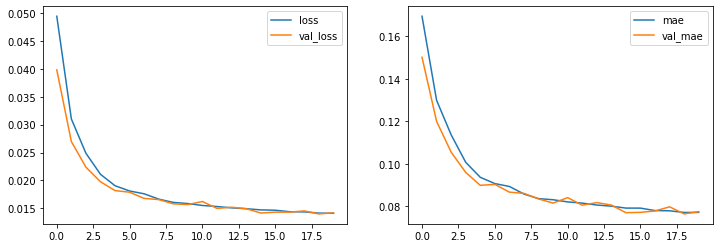

In [4]:
utils.plot_history(history)

In [5]:
model.evaluate(x_val, y_val)

63/63 [==============================] - 0s 4ms/step - loss: 0.0142 - mae: 0.0775 - last_time_step_mse: 0.0034


[0.014182680286467075, 0.07748259603977203, 0.0034046999644488096]

series.shape = (1, 60)
x_new.shape = (1, 50, 1), y_new.shape = (1, 10)
y_pred.shape = (1, 50, 10)


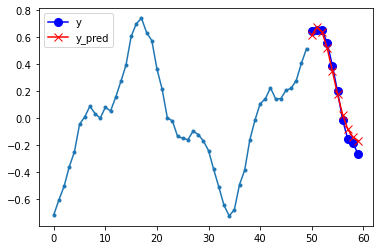

In [6]:
series = utils.generate_time_series(1, history_steps + forecast_steps, seed=43)
print(f"series.shape = {series.shape}")
x_new, y_new = series[:, :history_steps], series[:, -forecast_steps:]
x_new = np.expand_dims(x_new, -1)
print(f"x_new.shape = {x_new.shape}, y_new.shape = {y_new.shape}")

y_pred = model.predict(x_new)
print(f"y_pred.shape = {y_pred.shape}")
utils.plot_series_multiple_forecasts(x_new, y_new, y_pred[0, -1, :])